# Red Neuronal Recurrente

Crea una red neuronal para predecir el precio del dolar

In [1]:
# Librerias básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Librerias para el preprocesamiento de los datos
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Librerías para crear la red neuronal
from keras.models import Sequential
from keras.layers import Input, Dense, SimpleRNN, LSTM, GRU

## 1. Leer la información del *dataset dolar.csv*

In [2]:
data = pd.read_csv('datasets/dolar.csv', header=None)
data

,0
0,17.0297
1,17.0492
2,17.0458
3,16.8987
4,16.8133
...,...
432,18.4082
433,18.3232
434,18.4312
435,18.4457


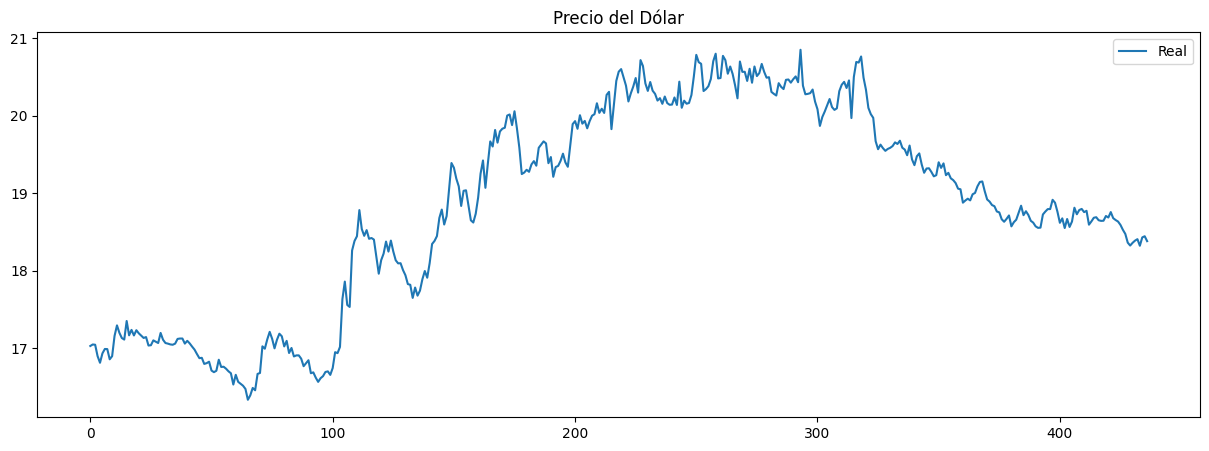

In [3]:
# Grafico de la serie de tiempo
plt.figure(figsize=(15, 5))
plt.title('Precio del Dólar')
plt.plot(data, label='Real')
plt.legend()

## 2. Crear secuencias temporales

In [4]:
# Normalización de los precios
prices = np.array(data[0])

normalizer = MinMaxScaler()
prices_norm = normalizer.fit_transform(prices.reshape(-1, 1))

# Crear datos de entrada y de salida, en base a secuencias
def create_sequences(data, time_steps=5):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_steps = 30
X, y = create_sequences(prices_norm, time_steps)

X = X.reshape((X.shape[0], X.shape[1], 1))

## 3. Crear Red Neuronal de Regresión

In [5]:
# Separar datos de entrada y de salida

X_nn = np.linspace(0, 1, len(prices_norm))

nn_model = Sequential([
    # Capa de entrada
    Input([1]),
    Dense(256, activation='relu'),

    # Capas ocultas
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),

    # Capa de salida
    Dense(1, activation='linear')
])

nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
nn_model.fit(X_nn, prices_norm, epochs=100, batch_size=400)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3901 - mae: 0.5538
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.3020 - mae: 0.4791
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2064 - mae: 0.3819
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1002 - mae: 0.2469
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0616 - mae: 0.2075
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1038 - mae: 0.2363
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0740 - mae: 0.2153
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0554 - mae: 0.2044
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0616 - mae: 0.2087
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0668 - mae: 0.2134
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0645 - mae: 0.2114
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0577 - mae: 0.2060
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/ste

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


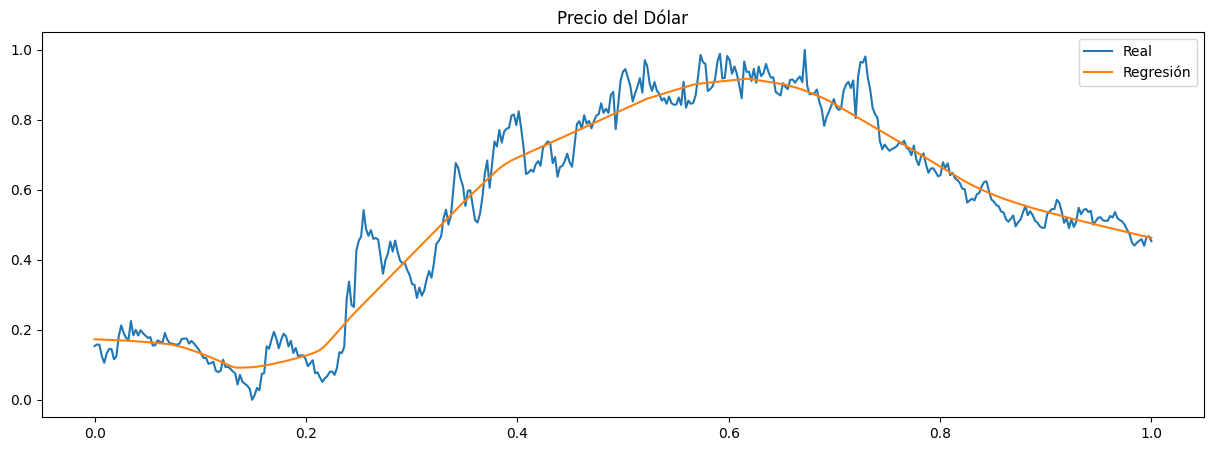

In [6]:
# Visualizar predicción
plt.figure(figsize=(15, 5))
plt.title('Precio del Dólar')
plt.plot(X_nn, prices_norm, label='Real')
plt.plot(X_nn, nn_model.predict(X_nn), label='Regresión')
plt.legend()

## 4. Crear Red Neuronal Recurrente Simple

In [7]:
rnn_model = Sequential([
    # Capa de entrada
    Input((time_steps, 1)),
    SimpleRNN(256, return_sequences=True),

    # Capas ocultas
    SimpleRNN(128),

    # Capa de salida
    Dense(1, activation='linear')
])

rnn_model.summary()

rnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
rnn_model.fit(X, y, epochs=50, batch_size=400) 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 30, 256)        │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115,457 (451.00 KB)

 Trainable params: 115,457 (451.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 2.0116 - mae: 1.3273
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.5024 - mae: 0.6372
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1727 - mae: 0.3737
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0121 - mae: 0.0869
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0614 - mae: 0.2251
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1025 - mae: 0.3016
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0153 - mae: 0.0999 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0974 - mae: 0.2875 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0225 - mae: 0.1218
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mae: 0.1659 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0242 - mae: 0.1296
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0155 - mae: 0.1000
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


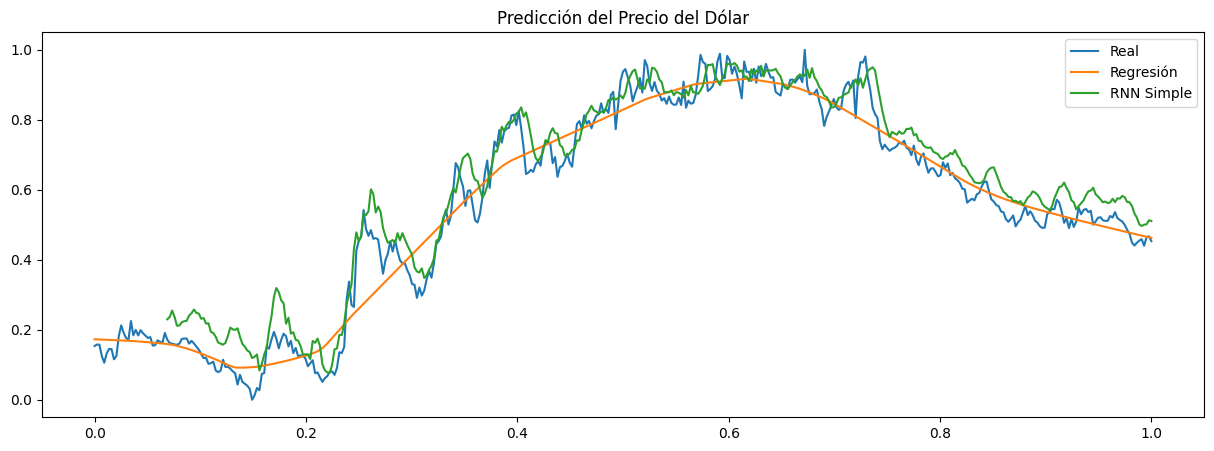

In [8]:
# Visualizar predicción
plt.figure(figsize=(15, 5))
plt.title('Predicción del Precio del Dólar')
plt.plot(X_nn, prices_norm, label='Real')
plt.plot(X_nn, nn_model.predict(X_nn), label='Regresión')
plt.plot(X_nn[time_steps:], rnn_model.predict(X), label='RNN Simple')
plt.legend()

## 5. Crear Red Neuronal Recurrente LSTM

In [9]:
lstm_model = Sequential([
    # Capa de entrada
    Input((time_steps, 1)),
    LSTM(256, return_sequences=True),

    # Capas ocultas
    LSTM(128),

    # Capa de salida
    Dense(1, activation='linear')
])

lstm_model.summary()

lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
lstm_model.fit(X, y, epochs=50, batch_size=400)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 256)        │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 461,441 (1.76 MB)

 Trainable params: 461,441 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.3877 - mae: 0.5605
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0104 - mae: 0.0811 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0246 - mae: 0.1430 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0255 - mae: 0.1366 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0532 - mae: 0.2009 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0437 - mae: 0.1813 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0177 - mae: 0.1121 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0065 - mae: 0.0675 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0178 - mae: 0.1209 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0159 - mae: 0.1133 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0070 - mae: 0.0705 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0072 - mae: 0.0694 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


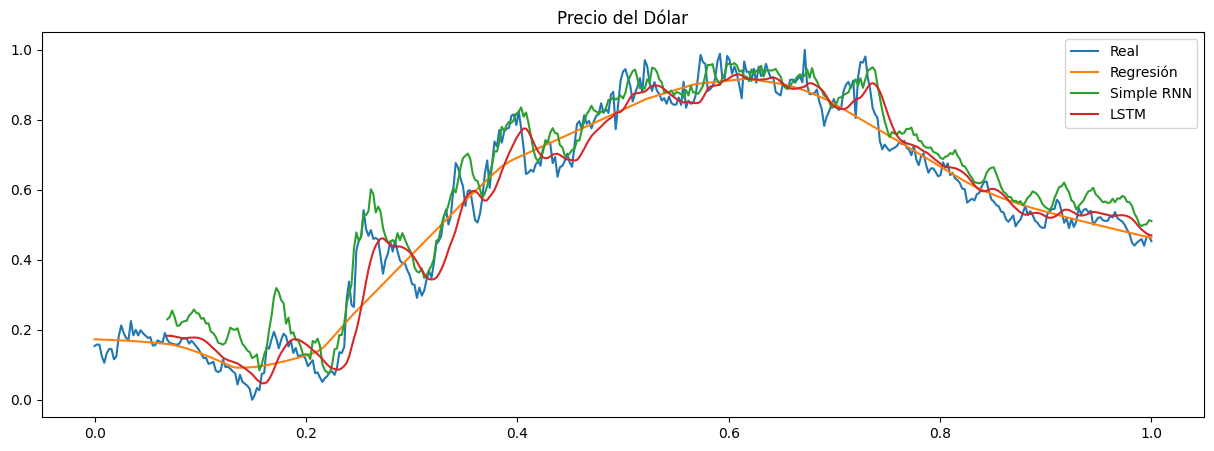

In [10]:
# Visualizar predicción
plt.figure(figsize=(15, 5))
plt.title('Precio del Dólar')
plt.plot(X_nn, prices_norm, label='Real')
plt.plot(X_nn, nn_model.predict(X_nn), label='Regresión')
plt.plot(X_nn[time_steps:], rnn_model.predict(X), label='Simple RNN')
plt.plot(X_nn[time_steps:], lstm_model.predict(X), label='LSTM')
plt.legend()

## 6. Crear Red Neuronal Recurrente GRU

In [11]:
gru_model = Sequential([
    # Capa de entrada
    Input((time_steps, 1)),
    GRU(256, return_sequences=True),

    # Capas ocultas
    GRU(128),

    # Capa de salida
    Dense(1, activation='linear')

])
gru_model.summary()

gru_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
gru_model.fit(X, y, epochs=50, batch_size=400)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 30, 256)        │       198,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 128)            │       148,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,265 (1.32 MB)

 Trainable params: 347,265 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.4593 - mae: 0.6108
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0525 - mae: 0.1990 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0627 - mae: 0.2427 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0498 - mae: 0.2151 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0042 - mae: 0.0541 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0150 - mae: 0.1048 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0244 - mae: 0.1348 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0165 - mae: 0.1104 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0052 - mae: 0.0589 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0038 - mae: 0.0525 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0097 - mae: 0.0909 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0093 - mae: 0.0890 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


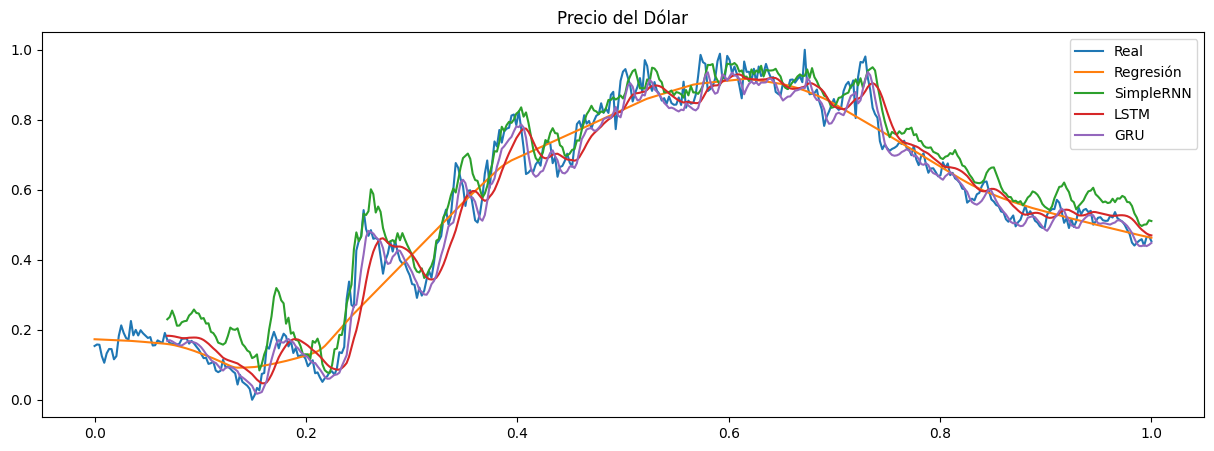

In [12]:
# Visualizar predicción
plt.figure(figsize=(15, 5))
plt.title('Precio del Dólar')
plt.plot(X_nn, prices_norm, label='Real')
plt.plot(X_nn, nn_model.predict(X_nn), label='Regresión')
plt.plot(X_nn[time_steps:], rnn_model.predict(X), label='SimpleRNN')
plt.plot(X_nn[time_steps:], lstm_model.predict(X), label='LSTM')
plt.plot(X_nn[time_steps:], gru_model.predict(X), label='GRU')
plt.legend()

## 7. Predecir el futuro

In [13]:
def next_time(model):
    Y = model.predict(prices_norm[-time_steps:].reshape(1, time_steps, 1))
    return normalizer.inverse_transform(Y.reshape(-1, 1))

def error(model, X, y):
    loss, mae = model.evaluate(X, y)
    normalizer.inverse_transform(np.array(mae).reshape(-1, 1))
    return f' con un error de +- {mae}'

print('En el siguiente paso de tiempo, el precio del dolar será de: ')
print(f' -> Regresión: ${normalizer.inverse_transform(nn_model(X_nn[1:2] + 1))[0, 0]}' + error(nn_model, X_nn, prices_norm))
print(f' -> RNN Simple: ${next_time(rnn_model)[0, 0]}' + error(rnn_model, X, y))
print(f' -> LSTM: ${next_time(lstm_model)[0, 0]}' + error(lstm_model, X, y))
print(f' -> GRU: ${next_time(gru_model)[0, 0]}' + error(gru_model, X, y))

En el siguiente paso de tiempo, el precio del dolar será de: 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0034 - mae: 0.0427      
 -> Regresión: $18.41954820086956 con un error de +- 0.042663224041461945
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0039 - mae: 0.0520 
 -> RNN Simple: $18.683685302734375 con un error de +- 0.051990434527397156
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0036 - mae: 0.0447
 -> LSTM: $18.450239181518555 con un error de +- 0.044707927852869034
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0018 - mae: 0.0302
 -> GRU: $18.358661651611328 con un error de +- 0.0301771592348814


In [14]:
time_steps = 5
nn_future = nn_model.predict(X_nn[:time_steps] + 1)

def future(model, X, time_steps=5):
    Y = []
    for i in range(time_steps):
        predict = model.predict(X[-time_steps:].reshape(1, time_steps, 1))
        X = np.append(X, predict[0, 0])
        Y.append(predict[0, 0])

    return np.array(Y)

rnn_future = future(rnn_model, prices_norm.copy(), time_steps)
lstm_future = future(lstm_model, prices_norm.copy(), time_steps)
gru_future = future(gru_model, prices_norm.copy(), time_steps)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


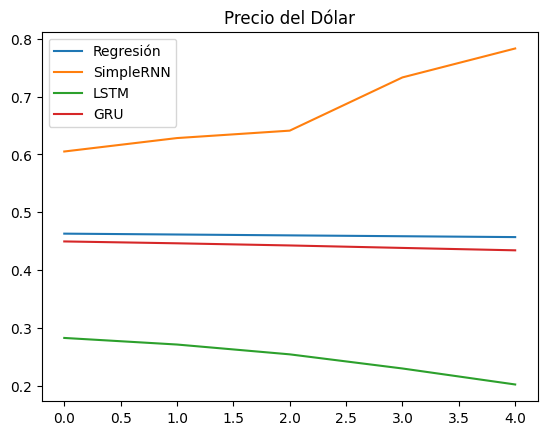

In [15]:
# Visualizar predicción
plt.title('Precio del Dólar')
plt.plot(nn_future, label = 'Regresión')
plt.plot(rnn_future, label = 'SimpleRNN')
plt.plot(lstm_future, label = 'LSTM')
plt.plot(gru_future, label = 'GRU')
plt.legend()